(sec:visualization_4)=
# Seaborn 시각화 라이브러리

In [1]:
import numpy as np
import pandas as pd

In [2]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

In [3]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

In [4]:
import matplotlib.pyplot as plt
import matplotlib

In [5]:
plt.rc("figure", figsize=(10, 6))

## seaborn 라이브러리 불러오기

In [6]:
import seaborn as sns

In [7]:
base_url = 'https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/'

tips = pd.read_csv(base_url+"tips.csv")

In [8]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

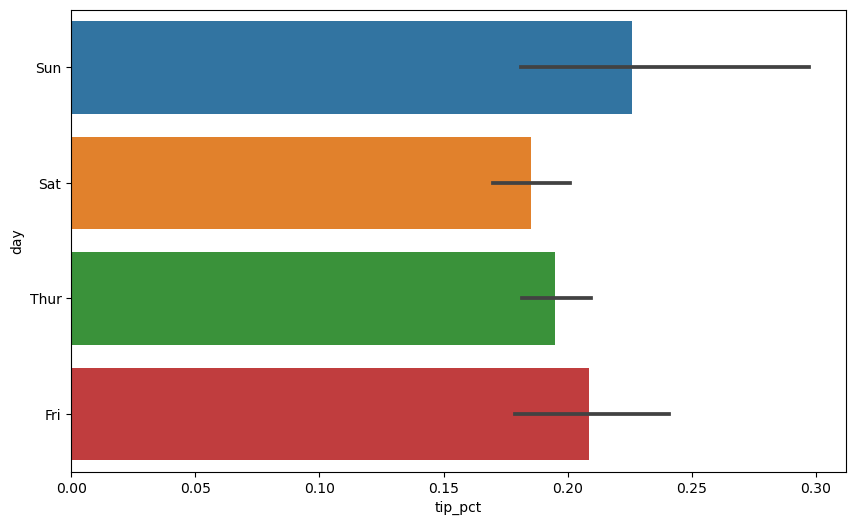

In [9]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

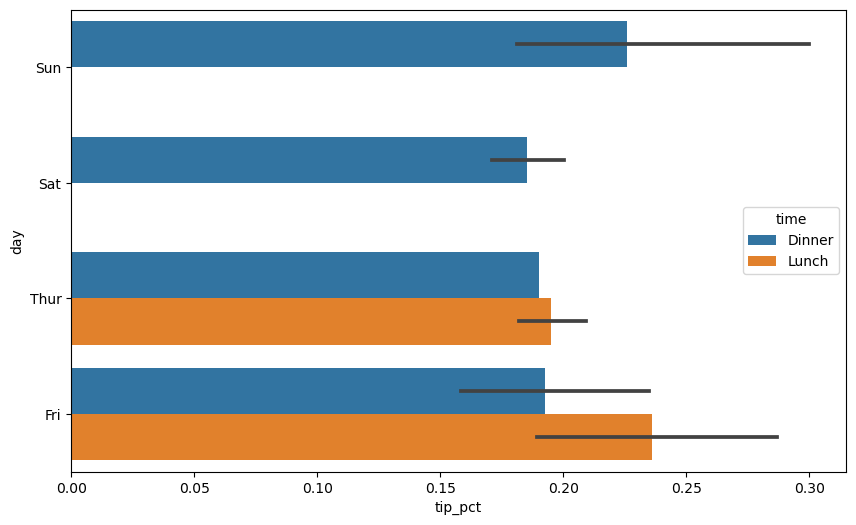

In [10]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [11]:
sns.set_style("whitegrid")

<Axes: ylabel='Frequency'>

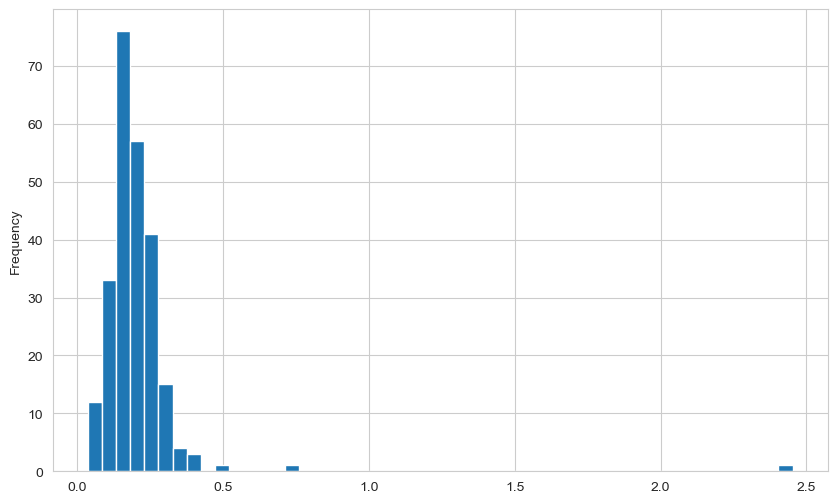

In [12]:
plt.figure()

tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

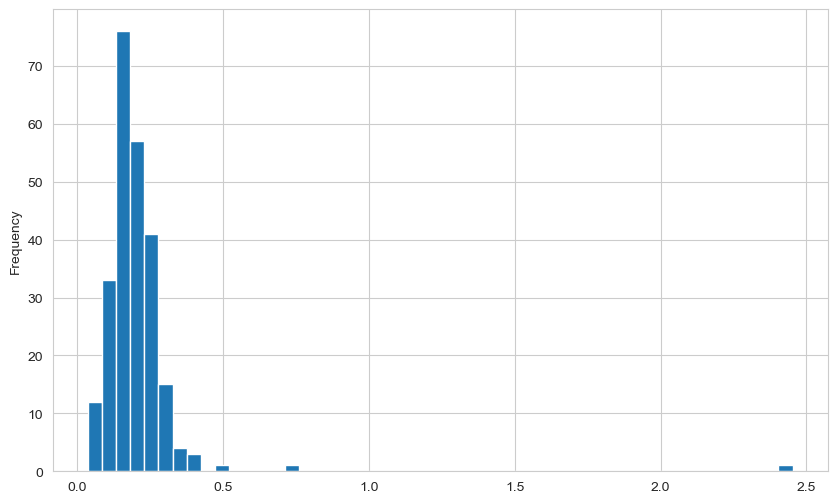

In [13]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

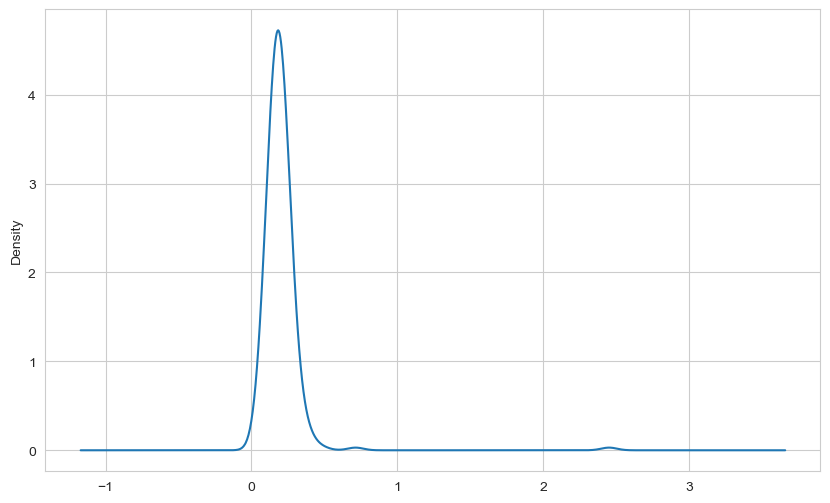

In [14]:
plt.figure()

tips["tip_pct"].plot.density()

In [15]:
plt.close('all')

In [16]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1, comp2]))
values

0      -0.204708
1       0.478943
2      -0.519439
3      -0.555730
4       1.965781
         ...    
395    10.262203
396     8.604772
397    12.671299
398     9.697922
399    10.885876
Length: 400, dtype: float64

<Axes: ylabel='Count'>

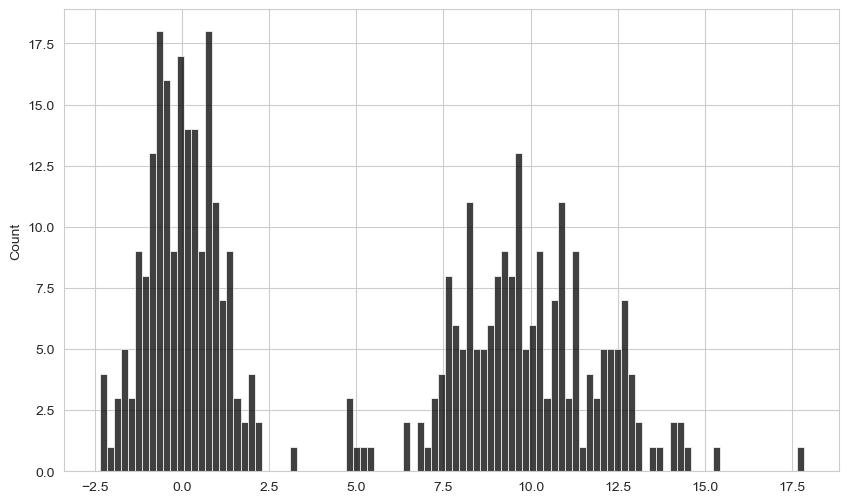

In [17]:
plt.figure()

sns.histplot(values, bins=100, color="black")

In [18]:
macro = pd.read_csv(base_url+"macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


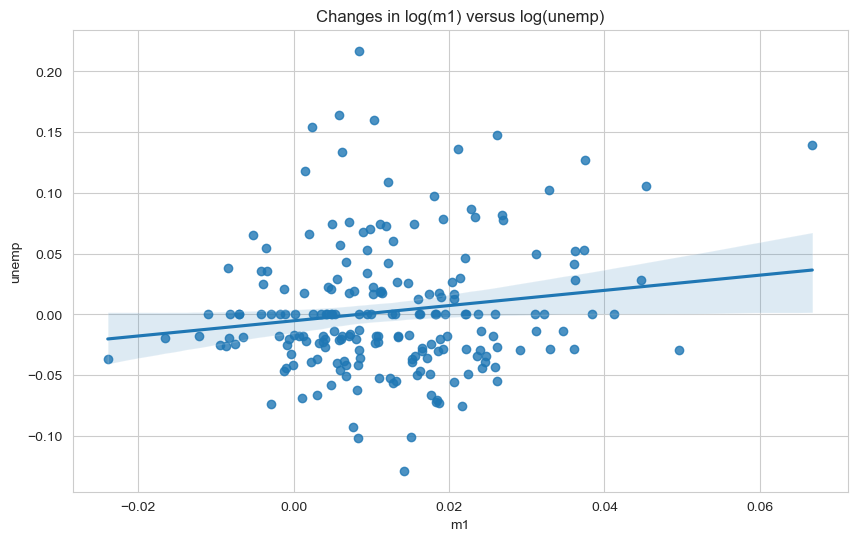

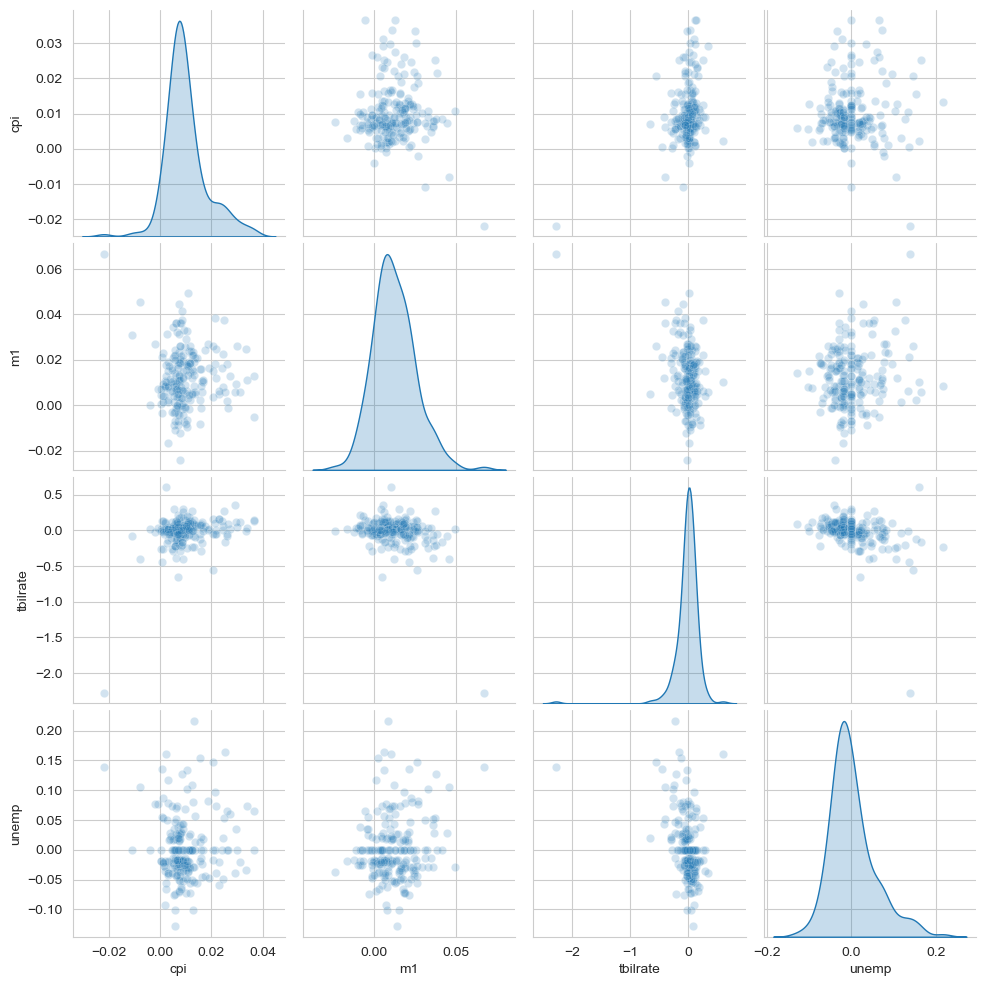

In [19]:
plt.figure()

ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

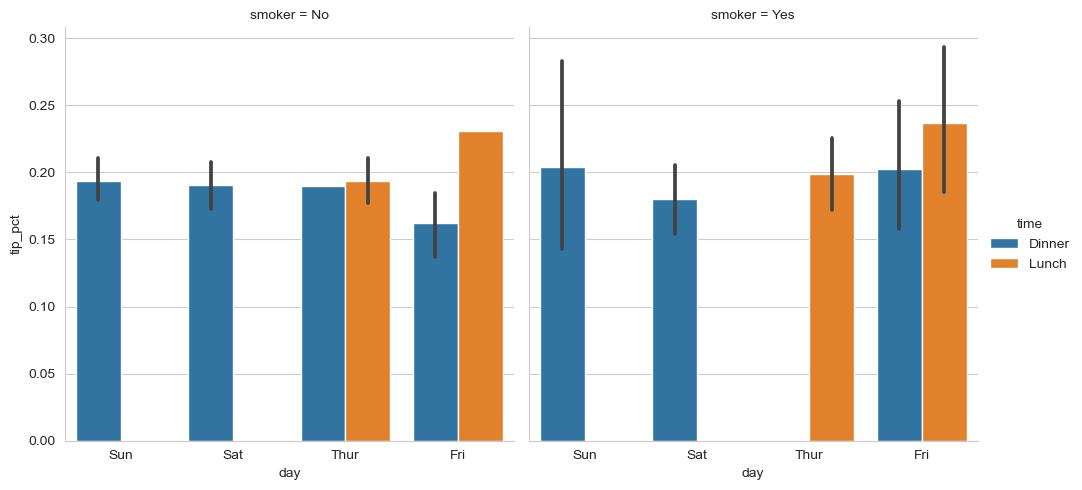

In [20]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

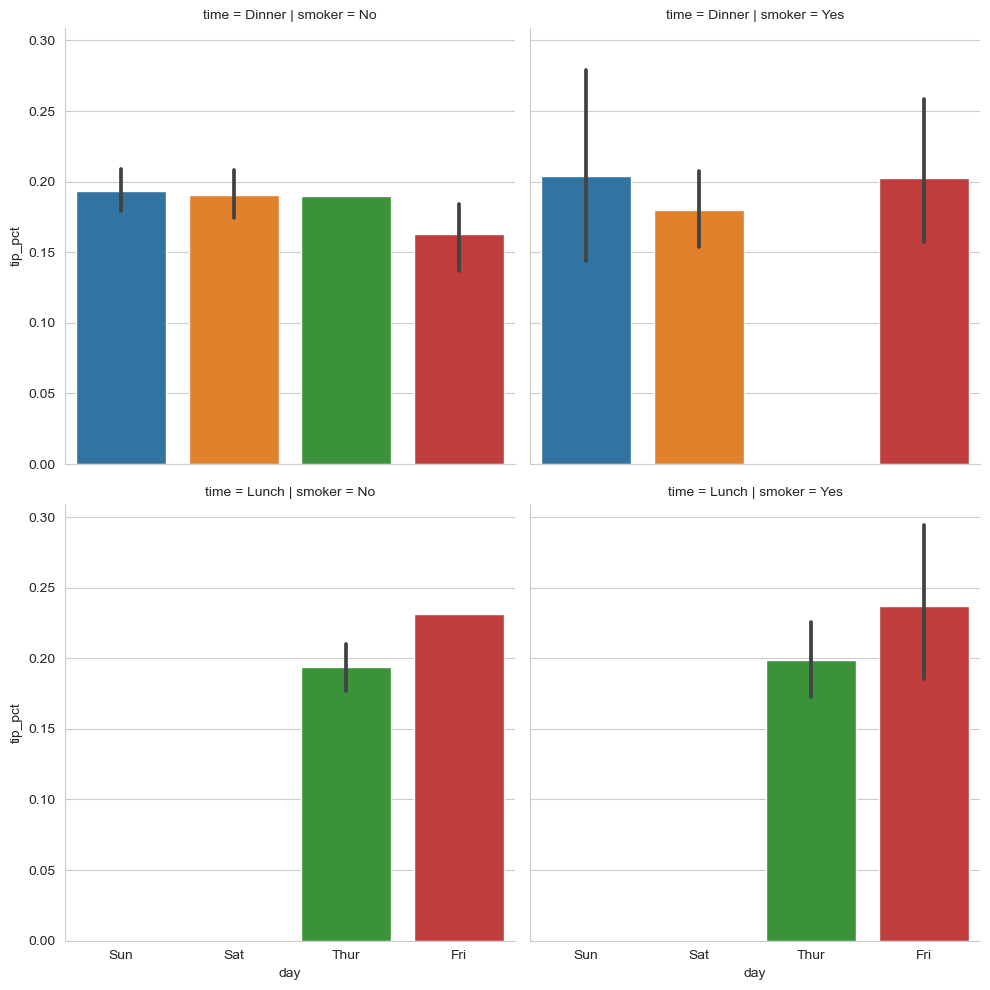

In [21]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

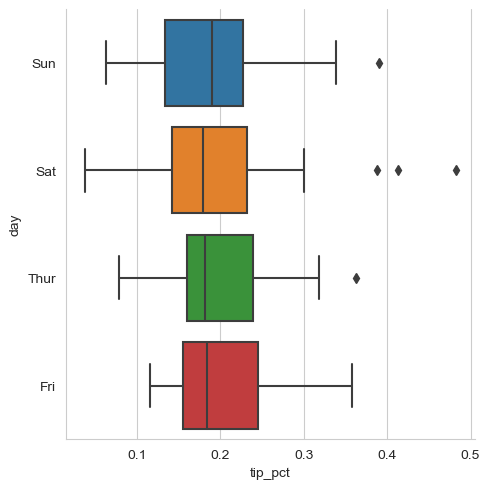

In [22]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])

In [23]:
plt.close('all')